### Loading the raw data


#### `1`  Put "https://data.sccgov.org/COVID-19/COVID-19-hospitalizations-by-date/5xkz-6esm" into a DataFrame and clean it up.

In [1]:
import pandas as pd
hospitalizations = pd.read_csv("./hospitalizations.csv", index_col="Date")
hospitalizations.head()

,icu_covid,icu_other,non_icu_covid,covid_new,covid_total,other_total
Date,,,,,,
2020-03-27,63!,NaN,62,NaN,125.0,0
2020-03-28,30!,NaN,111,NaN,141.0,0
2020-03-29,69!,NaN,81,NaN,150.0,0
2020-03-30,72!,NaN,82,NaN,154.0,0
2020-03-31,73!,NaN,76..,NaN,149.0,0


#### `2` Drop no-interested colums. 

In [2]:
hospitalizations.drop(["icu_other", "other_total"], axis=1, inplace=True)
hospitalizations.head()

,icu_covid,non_icu_covid,covid_new,covid_total
Date,,,,
2020-03-27,63!,62,NaN,125.0
2020-03-28,30!,111,NaN,141.0
2020-03-29,69!,81,NaN,150.0
2020-03-30,72!,82,NaN,154.0
2020-03-31,73!,76..,NaN,149.0


### Cleaning Data - Carry out data profiling
#### `1` Changing ```object``` to exponential ```int``` 




In [3]:
hospitalizations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 2020-03-27 to 2020-08-08
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   icu_covid      172 non-null    object 
 1   non_icu_covid  172 non-null    object 
 2   covid_new      152 non-null    float64
 3   covid_total    161 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.7+ KB


In [4]:
# "icu_covid" and "non_icu_covid" are object/str.
# hospitalizations["icu_covid"].astype(int)
# Raises an exception == gets an error:
# ValueError: invalid literal for int() with base 10: '63!'
# Let's see the values:
hospitalizations["icu_covid"].unique()

array(['63!', '30!', '69!', '72!', '73!', '82!', '75!', '76!', '74!',
       '77!', '66!', '64!', '65!', '58!', '67!', '56!', '61!', '55!',
       '50!', '45!', '43!', '36!', '37!', '35!', '33!', '29!', '25!',
       '26!', '23!', '21!', '22!', '19!', '17!', '15!', '18!', '14!',
       '12!', '13!', '10!', '9!', '8!', '16!', '32!', '31!', '34!', '40!',
       '46!', '47!', '49!', '53!', '54!', '42!', '44!', '51!', '57!',
       '52!', '48!', '38!', '39!', '41!'], dtype=object)

In [5]:
hospitalizations.loc[:,"icu_covid"] = hospitalizations.loc[:,"icu_covid"].apply(lambda x:int(x[:-1]))

In [6]:
hospitalizations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 2020-03-27 to 2020-08-08
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   icu_covid      172 non-null    int64  
 1   non_icu_covid  172 non-null    object 
 2   covid_new      152 non-null    float64
 3   covid_total    161 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.7+ KB


In [7]:
# hospitalizations["non_icu_covid"] = hospitalizations["non_icu_covid"].apply(lambda x:int(x))
# gets"ValueError: invalid literal for int() with base 10: '76..'
unique_non_icu_covid = hospitalizations["non_icu_covid"].unique()
unique_non_icu_covid

array(['62', '111', '81', '82', '76..', '70', '90', '89', '99', '95',
       '108', '115', '77', '74', '71', '84', '73', '69', '67', '76', '79',
       '64', '60', '59', '65', '55', '57', '54', '42', '40', '39', '37',
       '35', '31', '33', '26', '22', '25', '24', '28', '21', '18', '19',
       '16', '17', '15', '14', '13', '20', '23', '32', '45', '43', '52',
       '46', '50', '56', '58', '68', '75', '87', '94', '105', '107',
       '110', '116', '119', '117', '124', '114', '113', '127', '120',
       '122', '123', '109', '118', '112', '103', '102', '101', '93', '88',
       '97', '91', '86', '80', '78', '-73'], dtype=object)

In [8]:
weird_values = [n for n in unique_non_icu_covid if not n.isdigit()]
weird_values

['76..', '-73']

In [9]:
hospitalizations[hospitalizations["non_icu_covid"].isin(weird_values)].sort_index()

,icu_covid,non_icu_covid,covid_new,covid_total
Date,,,,
2020-03-31,73,76..,NaN,149.0
2020-09-03,45,-73,10.0,122.0


In [10]:
hospitalizations.loc["2020-03-31", "non_icu_covid"] = "76"
hospitalizations.loc["2020-09-03", "non_icu_covid"] = "73"
hospitalizations.loc[:,"non_icu_covid"] = hospitalizations.loc[:,"non_icu_covid"].apply(lambda x:int(x))

In [11]:
hospitalizations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 2020-03-27 to 2020-08-08
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   icu_covid      172 non-null    int64  
 1   non_icu_covid  172 non-null    int64  
 2   covid_new      152 non-null    float64
 3   covid_total    161 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 10.8+ KB


#### `2`  De-Duplicated: Remove duplicate or irrelevant observations.

In [12]:
# By setting keep on False, all duplicates are True.
hospitalizations[hospitalizations.index.duplicated(keep=False)==True].sort_index()

,icu_covid,non_icu_covid,covid_new,covid_total
Date,,,,
2020-07-30,45,124,25.0,178.0
2020-07-30,45,124,25.0,0.0
2020-07-31,51,122,27.0,182.0
2020-07-31,51,122,27.0,0.0
2020-08-01,51,123,18.0,183.0
2020-08-01,51,123,18.0,0.0
2020-08-02,51,122,21.0,181.0
2020-08-02,51,122,21.0,0.0
2020-08-03,49,114,10.0,169.0


In [13]:
hospitalizations.sort_values("Date")

,icu_covid,non_icu_covid,covid_new,covid_total
Date,,,,
2020-03-27,63,62,NaN,125.0
2020-03-28,30,111,NaN,141.0
2020-03-29,69,81,NaN,150.0
2020-03-30,72,82,NaN,154.0
2020-03-31,73,76,NaN,149.0
...,...,...,...,...
2020-08-31,43,86,9.0,131.0
2020-09-01,46,80,15.0,128.0
2020-09-02,47,78,15.0,128.0


In [14]:
# sorting by "covid_total" and for dropping all dups except the first.
hospitalizations.sort_values(["Date","covid_total"], ascending=False, inplace=True)

We want to see what is duplicated in ["Date", "icu_covid", "non_icu_covid", "covid_new"] but the duplicated method does not allow the index in the labels.

In [15]:
hospitalizations.loc[:,"date"] = hospitalizations.index

In [16]:
hospitalizations.head()

,icu_covid,non_icu_covid,covid_new,covid_total,date
Date,,,,,
2020-09-04,41,75,22.0,120.0,2020-09-04
2020-09-03,45,73,10.0,122.0,2020-09-03
2020-09-02,47,78,15.0,128.0,2020-09-02
2020-09-01,46,80,15.0,128.0,2020-09-01
2020-08-31,43,86,9.0,131.0,2020-08-31


In [17]:
hospitalizations.drop_duplicates(["icu_covid", "non_icu_covid","covid_new", "date"], inplace=True)
hospitalizations.drop("date", axis=1, inplace=True)

In [18]:
hospitalizations.loc["2020-08-08":"2020-07-30"]

,icu_covid,non_icu_covid,covid_new,covid_total
Date,,,,
2020-08-08,53,109,20.0,172.0
2020-08-07,52,109,25.0,170.0
2020-08-06,50,110,23.0,169.0
2020-08-05,48,113,29.0,169.0
2020-08-04,50,116,16.0,172.0
2020-08-03,49,114,10.0,169.0
2020-08-02,51,122,21.0,181.0
2020-08-01,51,123,18.0,183.0
2020-07-31,51,122,27.0,182.0


In [19]:
hospitalizations.describe()

,icu_covid,non_icu_covid,covid_new,covid_total
count,162.000000,162.000000,142.000000,151.000000
mean,41.012346,66.932099,16.014085,115.205298
std,18.861044,36.104081,10.753845,51.459281
min,8.000000,13.000000,0.000000,24.000000
25%,23.500000,28.750000,6.000000,68.000000
50%,43.500000,69.000000,15.000000,131.000000
75%,52.750000,102.750000,23.000000,157.500000
max,82.000000,127.000000,56.000000,189.000000


### Loading the raw data

#### `Correct the wrong data!`

In [20]:
hosps = pd.read_csv("./COVID-19_hospitalizations_by_date.csv",index_col="Date")
hosps.head()

,icu_covid,icu_pui,icu_other,icu_available,non_icu_covid,non_icu_pui,non_icu_other,non_icu_available,vents_pts,vents_available,...,covid_pui_pct_7davg,other_total,available_total,icu_covid_pct_7davg,icu_covid_pui_pct_7davg,non_icu_covid_pct_7davg,non_icu_covid_pui_pct_7davg,cap_pct_7davg_total,icu_cap_pct_7davg,non_icu_cap_pct_7davg
Date,,,,,,,,,,,,,,,,,,,,,
2020/03/27,63,22,NaN,66,62,52,NaN,293,95,NaN,...,NaN,0,359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/03/28,30,66,NaN,87,111,28,NaN,403,90,NaN,...,NaN,0,490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/03/29,69,13,NaN,91,81,49,NaN,549,115,NaN,...,NaN,0,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/03/30,72,34,NaN,68,82,74,NaN,579,110,NaN,...,NaN,0,647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/03/31,73,19,NaN,73,76,68,NaN,630,107,NaN,...,NaN,0,703,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
hosps.columns

Index(['icu_covid', 'icu_pui', 'icu_other', 'icu_available', 'non_icu_covid',
       'non_icu_pui', 'non_icu_other', 'non_icu_available', 'vents_pts',
       'vents_available', 'covid_new', 'covid_total', 'pui_total',
       'covid_total_7davg', 'pui_total_7davg', 'covid_pct_7davg',
       'covid_pui_pct_7davg', 'other_total', 'available_total',
       'icu_covid_pct_7davg', 'icu_covid_pui_pct_7davg',
       'non_icu_covid_pct_7davg', 'non_icu_covid_pui_pct_7davg',
       'cap_pct_7davg_total', 'icu_cap_pct_7davg', 'non_icu_cap_pct_7davg'],
      dtype='object')

In [22]:
wanted = ["icu_covid", "non_icu_covid", "covid_new", "covid_total"]
hosps = hosps[wanted]
hosps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 2020/03/27 to 2020/09/04
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   icu_covid      162 non-null    int64  
 1   non_icu_covid  162 non-null    int64  
 2   covid_new      142 non-null    float64
 3   covid_total    162 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 6.3+ KB


<AxesSubplot:xlabel='Date'>

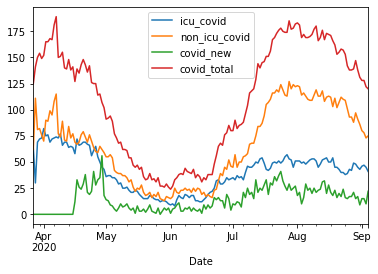

In [23]:
hosps.index = pd.to_datetime(hosps.index)
hosps.fillna(0, inplace=True)
hosps.plot()

`Thinking` What is "covid_total"?  Does it include "covid_new"?

In [24]:
hosps["sum_with_new"] = hosps["icu_covid"] + hosps["non_icu_covid"] + hosps["covid_new"]
hosps["sum_without_new"] = hosps["icu_covid"] + hosps["non_icu_covid"]

In [25]:
sames = hosps[(hosps["sum_with_new"] == hosps["sum_without_new"])]
print(len(sames))
sames  # all have covid_new == 0 

21


,icu_covid,non_icu_covid,covid_new,covid_total,sum_with_new,sum_without_new
Date,,,,,,
2020-03-27,63,62,0.0,125,125.0,125
2020-03-28,30,111,0.0,141,141.0,141
2020-03-29,69,81,0.0,150,150.0,150
2020-03-30,72,82,0.0,154,154.0,154
2020-03-31,73,76,0.0,149,149.0,149
2020-04-01,82,70,0.0,152,152.0,152
2020-04-02,75,90,0.0,165,165.0,165
2020-04-03,76,89,0.0,165,165.0,165
2020-04-04,69,99,0.0,168,168.0,168


In [26]:
interesting = hosps[hosps["sum_with_new"] != hosps["sum_without_new"]] 
interesting

,icu_covid,non_icu_covid,covid_new,covid_total,sum_with_new,sum_without_new
Date,,,,,,
2020-04-16,58,69,12.0,127,139.0,127
2020-04-17,72,67,33.0,139,172.0,139
2020-04-18,66,69,26.0,135,161.0,135
2020-04-19,67,76,24.0,143,167.0,143
2020-04-20,69,79,29.0,148,177.0,148
...,...,...,...,...,...,...
2020-08-31,43,86,9.0,131,138.0,129
2020-09-01,46,80,15.0,128,141.0,126
2020-09-02,47,78,15.0,128,140.0,125


In [27]:
interesting[interesting["sum_without_new"] == interesting["covid_total"]] 
# They changed the scheme of data collection?

,icu_covid,non_icu_covid,covid_new,covid_total,sum_with_new,sum_without_new
Date,,,,,,
2020-04-16,58,69,12.0,127,139.0,127
2020-04-17,72,67,33.0,139,172.0,139
2020-04-18,66,69,26.0,135,161.0,135
2020-04-19,67,76,24.0,143,167.0,143
2020-04-20,69,79,29.0,148,177.0,148
...,...,...,...,...,...,...
2020-07-04,35,50,11.0,85,96.0,85
2020-07-05,36,50,7.0,86,93.0,86
2020-07-06,33,55,21.0,88,109.0,88


In [28]:
strange = interesting[interesting["sum_without_new"] != interesting["covid_total"]]
strange = strange.loc[:, "covid_new":"sum_without_new"]
print(f"{len(strange)} in strange.")

strange.head()

58 in strange.


,covid_new,covid_total,sum_with_new,sum_without_new
Date,,,,
2020-07-09,19.0,116,131.0,112
2020-07-10,21.0,118,134.0,113
2020-07-11,15.0,120,130.0,115
2020-07-12,33.0,129,158.0,125
2020-07-13,21.0,144,154.0,133


In [29]:
83 + 58  # They add up.

141

<AxesSubplot:xlabel='Date'>

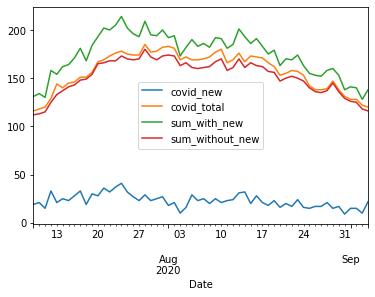

In [30]:
strange.plot()

In [31]:
from datetime import timedelta

# Is covid_total = sum_without_new + covid_new of the day before?
# list is better for manipulation

# Making a new column  - arithmetic comes next.  
strange["day_before_sum"] = strange.loc[:, "sum_without_new"]
strange.head()

,covid_new,covid_total,sum_with_new,sum_without_new,day_before_sum
Date,,,,,
2020-07-09,19.0,116,131.0,112,112
2020-07-10,21.0,118,134.0,113,113
2020-07-11,15.0,120,130.0,115,115
2020-07-12,33.0,129,158.0,125,125
2020-07-13,21.0,144,154.0,133,133


In [32]:
one_day_delta = timedelta(days=1)
for date_time in strange.index:
    day_before = str(date_time - one_day_delta)[:11]
#     print(date_time, day_before, hosps.loc[day_before, "covid_new"])
    strange.loc[date_time, "day_before_sum"] += hosps.loc[day_before, "covid_new"]

In [33]:
strange.head()

,covid_new,covid_total,sum_with_new,sum_without_new,day_before_sum
Date,,,,,
2020-07-09,19.0,116,131.0,112,137
2020-07-10,21.0,118,134.0,113,132
2020-07-11,15.0,120,130.0,115,136
2020-07-12,33.0,129,158.0,125,140
2020-07-13,21.0,144,154.0,133,166


<AxesSubplot:xlabel='Date'>

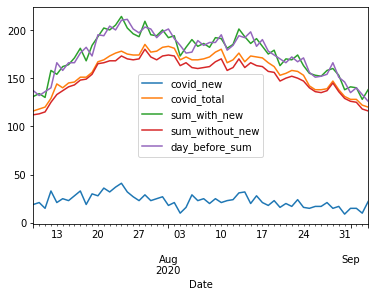

In [34]:
strange.plot()

In [35]:

# No, that isn't it.  So there's some strange reporting.  Giving up.  
# The site says:  New COVID-19 patients represent either newly admitted patients 
# with COVID-19 or PUIs already hospitalized that then test positive for COVID-19.
# PUI = Person Under Investigation

hosps.drop(["icu_covid", "non_icu_covid", "sum_with_new", "sum_without_new", "covid_new"], axis=1, inplace=True)
hosps.rename({"covid_total": "Daily_hosp_total"}, axis=1, inplace=True)
hosps.head()

,Daily_hosp_total
Date,
2020-03-27,125
2020-03-28,141
2020-03-29,150
2020-03-30,154
2020-03-31,149


### Loading the raw data



In [36]:
deaths = pd.read_csv("./Count_of_deaths_with_COVID-19_by_date.csv",   # LTCF = long-term care facility
                    index_col = "Date")

In [37]:
deaths.tail()

,LTCF,Non_ltcf,Total,Cumulative
Date,,,,
2020/08/30,0,3,3,253
2020/08/31,1,0,1,254
2020/09/02,1,0,1,255
2020/09/03,0,1,1,256
2020/09/04,1,0,1,257


<AxesSubplot:xlabel='Date'>

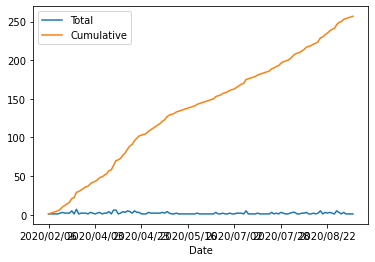

In [38]:
deaths.drop(["LTCF", "Non_ltcf"], inplace=True, axis=1)
deaths.plot()

<AxesSubplot:xlabel='Date'>

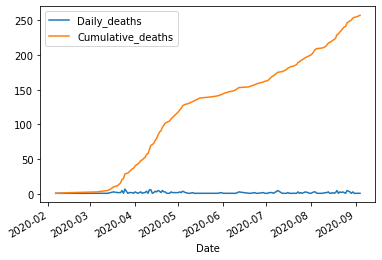

In [39]:
deaths.columns = ["Daily_deaths", "Cumulative_deaths"]
deaths.index = pd.to_datetime(deaths.index)
deaths.plot()

### Loading the raw data

<AxesSubplot:xlabel='Date'>

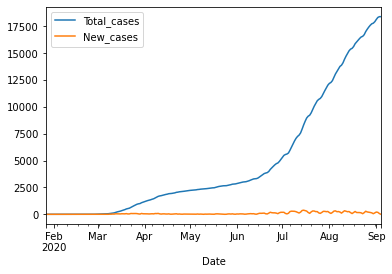

In [40]:
cases = pd.read_csv("./COVID-19_case_counts_by_date.csv",
                    index_col="Date")
cases.index = pd.to_datetime(cases.index)
cases.plot()

#### We can't see how many are sick on a particular day from these data.

In [41]:
cases.rename({"Total_cases":"Cumulative_cases"}, axis=1, inplace=True)
cases

,Cumulative_cases,New_cases
Date,,
2020-01-27,1,1
2020-01-28,1,0
2020-01-29,2,1
2020-01-30,2,0
2020-01-31,2,0
...,...,...
2020-08-31,17918,138
2020-09-01,18130,212
2020-09-02,18313,183


### Joining the data sets.

`hosps` from ./COVID-19_hospitalizations_by_date.csv

`deaths` from ./Count_of_deaths_with_COVID-19_by_date.csv

`cases` from ./COVID-19_case_counts_by_date.csv

In [42]:

# joining these three datasets on the index, the default, gives an error:  
# index has overlapping values
# I found three ways to fix this
#  1. use concat
#  2. leave dates in str form and change them to datetime after the join
#  3. reindex so that the three datasets have the same index
# Doing # 3.

print(f""" hosps: from {hosps.index[0]} to {hosps.index[-1]} = {len(hosps.index)}
deaths: from {deaths.index[0]} to {deaths.index[-1]} = {len(deaths.index)}
 cases: from {cases.index[0]} to {cases.index[-1]} = {len(cases.index)}""")

 hosps: from 2020-03-27 00:00:00 to 2020-09-04 00:00:00 = 162
deaths: from 2020-02-06 00:00:00 to 2020-09-04 00:00:00 = 132
 cases: from 2020-01-27 00:00:00 to 2020-09-04 00:00:00 = 222


#### Reindex so that the three datasets have the same index!

<AxesSubplot:xlabel='Date'>

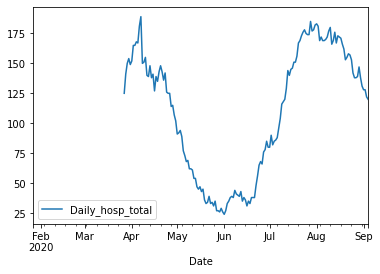

In [43]:
hosps = hosps.reindex(cases.index) # does not have an inplace argument
hosps.plot()

<AxesSubplot:xlabel='Date'>

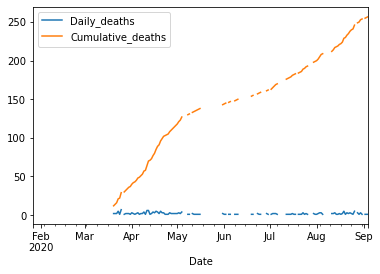

In [44]:
deaths = deaths.reindex(cases.index)
deaths.plot()

<AxesSubplot:xlabel='Date'>

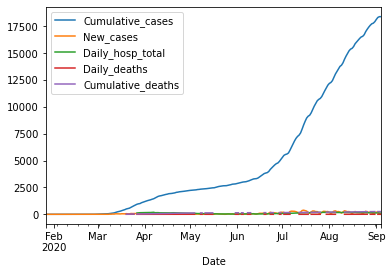

In [45]:
cases = cases.join([hosps, deaths])
cases.plot()

In [46]:
cases.columns

Index(['Cumulative_cases', 'New_cases', 'Daily_hosp_total', 'Daily_deaths',
       'Cumulative_deaths'],
      dtype='object')

In [47]:
small_columns = list(cases.columns)
small_columns.remove("Cumulative_cases")
small_columns

['New_cases', 'Daily_hosp_total', 'Daily_deaths', 'Cumulative_deaths']

Text(0, 0.5, 'Cumulative Cases')

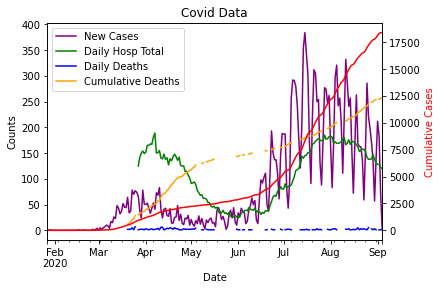

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(title="Covid Data") #Add an Axes to the current figure or retrieve an existing Axes.
colors = ["purple","g","b", "orange"]

for color, column in zip(colors, small_columns):
    column_str = column.replace('_', ' ').title()
    axes = cases[column].plot(color=color, label=column_str)
axes.set_ylabel("Counts") #Set the label for the y-axis.
plt.legend()

axes = cases["Cumulative_cases"].plot(c="r", secondary_y=True,label="Cumulative Cases")
axes.set_ylabel("Cumulative Cases", color='r')


<AxesSubplot:xlabel='Date'>

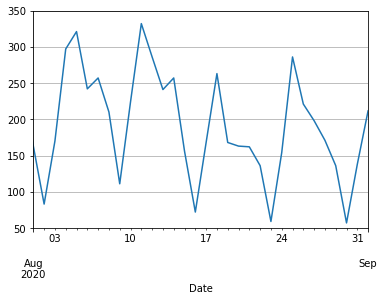

In [49]:

# Looking closer at a piece to see that New_cases cycling somewhat regularly.
cases["New_cases"].plot(xlim=("2020-08-01","2020-09-01"), ylim=(50,350),grid=True)

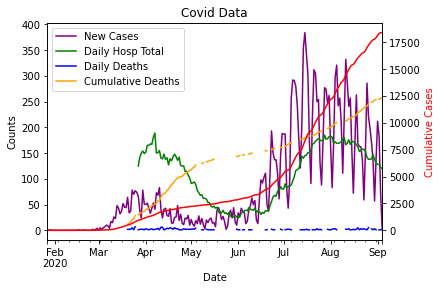

In [50]:
fig

In [51]:
ax

<AxesSubplot:title={'center':'Covid Data'}, xlabel='Date', ylabel='Counts'>

(0.0, 10.0)

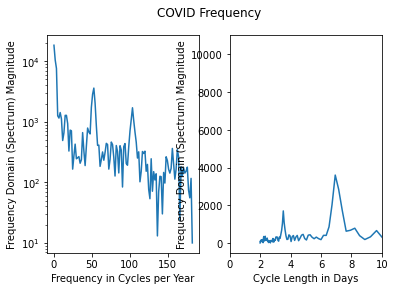

In [52]:
# numpy.fft-Discrete Fourier Transform. 
# rfft-Compute the one-dimensional DFT for real input.
# rfftfreq-Return the DFT sample frequencies (for usage with rfft, irfft).
from numpy.fft import rfft, rfftfreq
import numpy as np

sampling_rate = 365 # per year
results = pd.DataFrame()
results["fft_new_cases"] = abs(rfft(cases["New_cases"])) # np array
results["fft_new_cases"].replace(0, np.nan, inplace=True) 
results["frequencies"] = rfftfreq(len(cases)) * sampling_rate  #len(cases)=222
fig, (ax, ax1) = plt.subplots(1,2)

fig.suptitle('COVID Frequency')
ax.semilogy(results["frequencies"], results["fft_new_cases"]) #Make a plot with log scaling on the y axis.
ax.set_xlabel('Frequency in Cycles per Year')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')

ax1.plot(sampling_rate/results["frequencies"], results["fft_new_cases"])  # Scaling frequencies to be per day
ax1.set_xlabel("Cycle Length in Days") 
ax1.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax1.set_xlim((0,10))

Wow!  That's seems significant.

Let's try to see the movement in deaths/cases.

In [53]:
cases["%deaths_from_hospital_data"] = cases["Daily_deaths"]/cases["Daily_hosp_total"]
cases["%deaths_from_cumulatives"] = cases["Cumulative_deaths"]/cases["Cumulative_cases"]

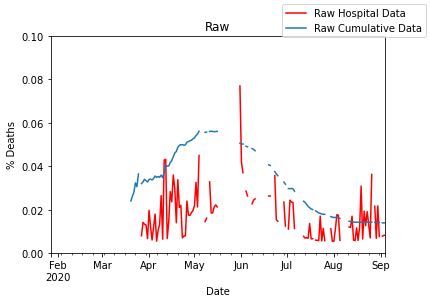

In [54]:
fig = plt.figure()
fig.add_subplot(title="Raw")
cases["%deaths_from_hospital_data"].plot(label="Raw Hospital Data", ylabel="% Deaths", color="r",ylim=(0,.1))
cases["%deaths_from_cumulatives"].plot(label="Raw Cumulative Data", ylim=(0,.1))
fig.legend()

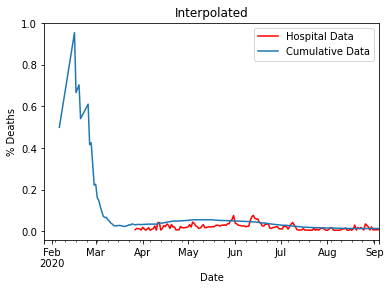

In [55]:
# pandas.DataFrame.interpolate - Fill NaN values using an interpolation method.
cases["%deaths_from_hospital_data_interpolated"] = cases["Daily_deaths"].interpolate()/cases["Daily_hosp_total"].interpolate()
cases["%deaths_from_cumulatives_interpolated"] = cases["Cumulative_deaths"].interpolate()/cases["Cumulative_cases"].interpolate()

fig = plt.figure()
fig.add_subplot(title="Interpolated")
cases["%deaths_from_hospital_data_interpolated"].plot(label="Hospital Data", ylabel="% Deaths", color="r")
cases["%deaths_from_cumulatives_interpolated"].plot(label="Cumulative Data")
plt.legend()

In [56]:
# dropping before 3/15
# trimmed_cases = cases.loc[:"2020-03-14",:]  # produces SettingWithCopyWarning in division below
droppers = cases.index[cases.index < "2020-03-15"]
cases_trimmed = cases.loc[:,["Daily_deaths", "Daily_hosp_total","%deaths_from_hospital_data_interpolated", 
                                      "Cumulative_deaths", "Cumulative_cases",
                             "%deaths_from_cumulatives_interpolated"]]
cases_trimmed.drop(droppers, inplace=True)

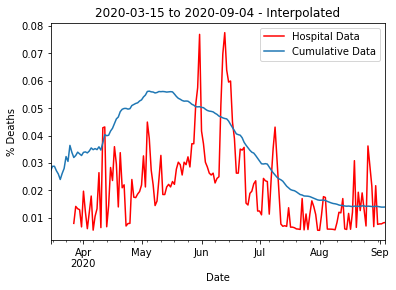

In [57]:
fig = plt.figure()
first_day = f"{cases_trimmed.index[0]}"[:10]
last_day = f"{cases_trimmed.index[-1]}"[:10]
fig.add_subplot(title=f"{first_day} to {last_day} - Interpolated")
cases_trimmed["%deaths_from_hospital_data_interpolated"].plot(label="Hospital Data", ylabel="% Deaths", color="r")
cases_trimmed["%deaths_from_cumulatives_interpolated"].plot(label="Cumulative Data")
plt.legend()

## Rolling Statistics
We'll get the rolling mean over a week


In [58]:
# ?cases.rolling-Provide rolling window calculations.
from datetime import timedelta
one_week = timedelta(days=7)

cases_trimmed["%rolling_deaths_from_hospital_data"] = cases_trimmed["Daily_deaths"].rolling(one_week).mean(
                                                        )/cases_trimmed["Daily_hosp_total"].rolling(one_week).mean()

cases_trimmed["%rolling_deaths_from_cumulatives"] = cases_trimmed["Cumulative_deaths"].rolling(one_week).mean(
                                                    )/cases_trimmed["Cumulative_cases"].rolling(one_week).mean()

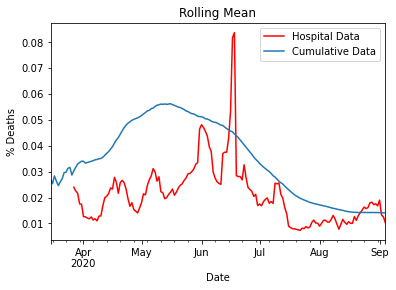

In [59]:
fig = plt.figure()
fig.add_subplot(title="Rolling Mean")
cases_trimmed["%rolling_deaths_from_hospital_data"].plot(label="Hospital Data", ylabel="% Deaths", color="r")
cases_trimmed["%rolling_deaths_from_cumulatives"].plot(label="Cumulative Data")
plt.legend()

#### Looking for correlations.

In [60]:
list(enumerate(cases.columns))

[(0, 'Cumulative_cases'),
 (1, 'New_cases'),
 (2, 'Daily_hosp_total'),
 (3, 'Daily_deaths'),
 (4, 'Cumulative_deaths'),
 (5, '%deaths_from_hospital_data'),
 (6, '%deaths_from_cumulatives'),
 (7, '%deaths_from_hospital_data_interpolated'),
 (8, '%deaths_from_cumulatives_interpolated')]

In [61]:
cases.drop(cases.columns[5:], axis=1, inplace=True)
cases.columns

Index(['Cumulative_cases', 'New_cases', 'Daily_hosp_total', 'Daily_deaths',
       'Cumulative_deaths'],
      dtype='object')

In [62]:
corr = cases.corr()
corr.replace(1, 0, inplace=True) # So that the diagonal is not the max
corr

,Cumulative_cases,New_cases,Daily_hosp_total,Daily_deaths,Cumulative_deaths
Cumulative_cases,0.000000,0.714753,0.537553,-0.060846,0.888117
New_cases,0.714753,0.000000,0.508678,-0.069607,0.582687
Daily_hosp_total,0.537553,0.508678,0.000000,0.227941,0.114544
Daily_deaths,-0.060846,-0.069607,0.227941,0.000000,-0.144828
Cumulative_deaths,0.888117,0.582687,0.114544,-0.144828,0.000000


In [63]:
max_corr = corr.max().max()
max_corr

0.88811669733393

In [64]:
big_corr = .7
corr[(corr["Cumulative_cases"] > big_corr) 
     | (corr["New_cases"] > big_corr) 
     | (corr["Daily_hosp_total"] > big_corr)
     |(corr["Daily_deaths"] > big_corr) 
     | (corr["Cumulative_deaths"] > big_corr)]

,Cumulative_cases,New_cases,Daily_hosp_total,Daily_deaths,Cumulative_deaths
Cumulative_cases,0.000000,0.714753,0.537553,-0.060846,0.888117
New_cases,0.714753,0.000000,0.508678,-0.069607,0.582687
Cumulative_deaths,0.888117,0.582687,0.114544,-0.144828,0.000000


In [65]:

# Finding the row/column with correlations > big_corr

big_correlations = {}

for col in corr.columns:
    for ind in corr.index:
        if corr.loc[ind, col] >= big_corr:
            d_key = tuple(sorted([ind, col]))
            big_correlations[d_key] = corr.loc[ind, col]
print("Big Correlations:",)
for d_key in sorted(big_correlations, key=lambda d_key:big_correlations.get(d_key), reverse=True):
     print(f"{big_correlations[d_key]:.3f} : {d_key[0]} {d_key[1]}")

Big Correlations:
0.888 : Cumulative_cases Cumulative_deaths
0.715 : Cumulative_cases New_cases


In [66]:
big_corr_cols = []
for cor in big_correlations:
    big_corr_cols.extend([cor[0], cor[1]])
big_corr_cols = set(big_corr_cols)
big_corr_cols

{'Cumulative_cases', 'Cumulative_deaths', 'New_cases'}

[]

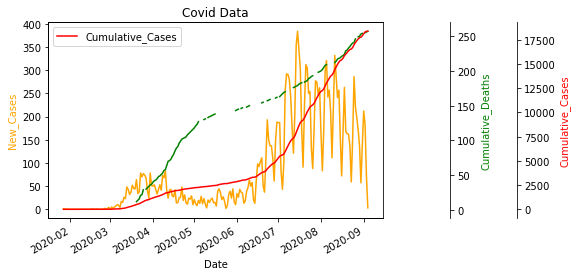

In [67]:
fig, axes = plt.subplots()
axes.set_xlabel("Date")
fig.autofmt_xdate() # rotate them and right align them.
axes.set_title("Covid Data")
cols_to_plot = list(big_corr_cols)

colors = ["blue", "red", "green", "orange"]
color = colors.pop()
first_column = cols_to_plot.pop(0)
first_label = first_column.title()

axes.set_ylabel(first_label, color=color)
axes.plot(cases[first_column], color=color, label=first_label)

new_axes = []
axis_position = 1  

def SetTwin(col):
    global axis_position  # to assign to a global identifier
    color = colors.pop()
    new_axes.append(axes.twinx()) #Axes.twinx()-Create a twin Axes sharing the xaxis.
    label = col.title()
    new_axes[-1].set_ylabel(label, color=color)
    new_axes[-1].plot(cases[col], color=color, label=label)
    axis_position += .2
    new_axes[-1].spines["right"].set_position(("axes", axis_position))
    
for col in cols_to_plot:
    SetTwin(col)

plt.legend()
plt.plot()

## Reshaping with `unstack`

In [68]:
abs_corr = cases.corr().abs().replace(1,0)

corr_unstacked = abs_corr.unstack() #Pivot a level of the (necessarily hierarchical) index labels.
corr_unstacked.sort_values(ascending=False)

Cumulative_deaths  Cumulative_cases     0.888117
Cumulative_cases   Cumulative_deaths    0.888117
                   New_cases            0.714753
New_cases          Cumulative_cases     0.714753
                   Cumulative_deaths    0.582687
Cumulative_deaths  New_cases            0.582687
Daily_hosp_total   Cumulative_cases     0.537553
Cumulative_cases   Daily_hosp_total     0.537553
New_cases          Daily_hosp_total     0.508678
Daily_hosp_total   New_cases            0.508678
                   Daily_deaths         0.227941
Daily_deaths       Daily_hosp_total     0.227941
Cumulative_deaths  Daily_deaths         0.144828
Daily_deaths       Cumulative_deaths    0.144828
Daily_hosp_total   Cumulative_deaths    0.114544
Cumulative_deaths  Daily_hosp_total     0.114544
New_cases          Daily_deaths         0.069607
Daily_deaths       New_cases            0.069607
Cumulative_cases   Daily_deaths         0.060846
Daily_deaths       Cumulative_cases     0.060846
Cumulative_cases   C

In [69]:
cases.corr().abs() #The abs() function returns the absolute value of the given number.

,Cumulative_cases,New_cases,Daily_hosp_total,Daily_deaths,Cumulative_deaths
Cumulative_cases,1.000000,0.714753,0.537553,0.060846,0.888117
New_cases,0.714753,1.000000,0.508678,0.069607,0.582687
Daily_hosp_total,0.537553,0.508678,1.000000,0.227941,0.114544
Daily_deaths,0.060846,0.069607,0.227941,1.000000,0.144828
Cumulative_deaths,0.888117,0.582687,0.114544,0.144828,1.000000


In [70]:
cases

,Cumulative_cases,New_cases,Daily_hosp_total,Daily_deaths,Cumulative_deaths
Date,,,,,
2020-01-27,1,1,NaN,NaN,NaN
2020-01-28,1,0,NaN,NaN,NaN
2020-01-29,2,1,NaN,NaN,NaN
2020-01-30,2,0,NaN,NaN,NaN
2020-01-31,2,0,NaN,NaN,NaN
...,...,...,...,...,...
2020-08-31,17918,138,131.0,1.0,254.0
2020-09-01,18130,212,128.0,NaN,NaN
2020-09-02,18313,183,128.0,1.0,255.0


In [71]:
big_corr_cols=list(big_corr_cols)
big_corrs = cases.loc[:,big_corr_cols]
big_corrs.describe()

,New_cases,Cumulative_deaths,Cumulative_cases
count,222.000000,132.000000,222.000000
mean,82.828829,136.643939,4794.743243
std,95.217814,72.610235,5495.565232
min,0.000000,1.000000,1.000000
25%,13.000000,79.250000,590.500000
50%,41.500000,144.500000,2466.500000
75%,136.750000,192.250000,7201.750000
max,384.000000,257.000000,18388.000000


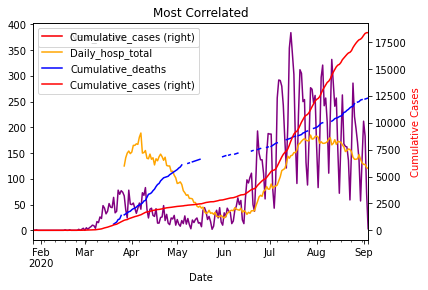

In [72]:
fig = plt.figure()
fig.add_subplot(title = "Most Correlated")

cases["New_cases"].plot(c="purple", legend="New Cases") # Doesn't show up in the legend!
cases["Daily_hosp_total"].plot(c="orange", legend="Daily Hospital Total")
cases["Cumulative_deaths"].plot(c="b", legend="Cumulative Deaths")
axcc = cases["Cumulative_cases"].plot(c="r", secondary_y=True, legend="Cumulative Cases")
axcc.set_ylabel("Cumulative Cases",color='r')
plt.legend()